In [3]:
import tensorflow as tf
import keras
print(tf.__version__)

2.9.2


In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


In [6]:
# train_data의 하나(numpy)에서 10개 정도 확인해 보기 
print(type(train_data[0]),  len(train_data[0]))  # 자료형과 개수
print("하나의 리뷰 단어 개수 : ", len(train_data[0]))
train_data[0][0:15]

<class 'list'> 218
하나의 리뷰 단어 개수 :  218


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]

In [7]:
# 5개의 긍정/부정 확인
train_labels[0:5]

array([1, 0, 0, 1, 0])

In [8]:
[max(sequence) for sequence in train_data][0:10] # 10개 리뷰의 각 리뷰의 단어 인덱스의 최대값

[7486, 9837, 6905, 9941, 7224, 7982, 9363, 9820, 7612, 8419]

In [9]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()

# 전체 단어:인덱스 쌍의 수
print( len(word_index) )  # 88584개
list_word_index = list([ (value, key) for (key, value) in word_index.items() ])
list_word_index[0:10]

1641221/1641221 [==============================] - 0s 0us/step
88584


[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling')]

In [11]:
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [12]:
# reverse_word_index.get(인덱스)       # 인덱스에 해당되는 단어가 출력
# reverse_word_index.get(인덱스, '?')  # 인덱스에 해당되는 단어가 출력되는데, 단어가 없으면 ? 출력
for i in range(0, 50, 1):
    print( reverse_word_index.get(i, '?'), end= "   " )
    
print("train 데이터 첫번째 3단어 살펴보기")
print("index 14 : ", reverse_word_index.get(14-3, '?'))
print("index 22 : ", reverse_word_index.get(22-3, '?'))
print("index 16 : ", reverse_word_index.get(16-3, '?'))

?   the   and   a   of   to   is   br   in   it   i   this   that   was   as   for   with   movie   but   film   on   not   you   are   his   have   he   be   one   all   at   by   an   they   who   so   from   like   her   or   just   about   it's   out   has   if   some   there   what   good   train 데이터 첫번째 3단어 살펴보기
index 14 :  this
index 22 :  film
index 16 :  was


In [13]:
### 첫번째 리뷰 실제 내용 확인해 보기.
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [14]:
# [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
# 의미 : 각각의 인덱스(218)에 대한 단어를 리스트 형태로 만든다.
print("첫번째 리뷰의 인덱스를 단어로 매칭시켜서 보여준 것")
print([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# 각각의 단어 리스트를 공백하나를 넣어주면서 하나의 문자열로 묶어 준것. 

첫번째 리뷰의 인덱스를 단어로 매칭시켜서 보여준 것
['?', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '?', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '?', 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '?', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you'

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

In [16]:
print("변환 전 : ", train_data.shape)
X_train = vectorize_sequences(train_data)
print("변환 후 : ", X_train.shape)
X_train

변환 전 :  (25000,)
변환 후 :  (25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(type(y_train), type(y_test))
y_train.shape, y_test.shape

y_train, y_test

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(array([1., 0., 0., ..., 0., 1., 0.], dtype=float32),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))

In [20]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
print("변환 전 : ", train_data.shape)
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
print("변환 후 : ", X_train.shape, X_test.shape)
X_train

변환 전 :  (25000,)
변환 후 :  (25000, 10000) (25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [23]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 56ms/step - loss: 0.4752 - accuracy: 0.8225 - val_loss: 0.3540 - val_accuracy: 0.8770
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2731 - accuracy: 0.9079 - val_loss: 0.2879 - val_accuracy: 0.8904
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2075 - accuracy: 0.9247 - val_loss: 0.2809 - val_accuracy: 0.8889
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1724 - accuracy: 0.9386 - val_loss: 0.2905 - val_accuracy: 0.8846
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1496 - accuracy: 0.9482 - val_loss: 0.3118 - val_accuracy: 0.8786
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1317 - accuracy: 0.9544 - val_loss: 0.3256 - val_accuracy: 0.8773
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1182 - accuracy: 0.9590 - val_loss: 0.3473 - val_accuracy: 0.8752
Epoch 8/20
49

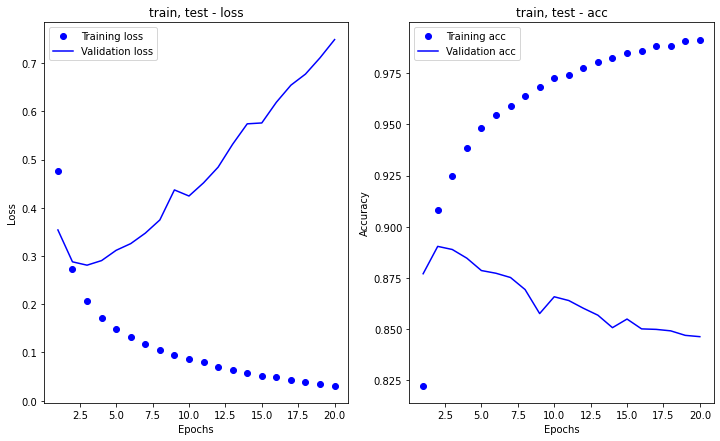

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
# 'bo'는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# 'b'는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('train, test - loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('train, test - acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='sigmoid', input_shape=(10000,)))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=30, batch_size=512, validation_data=(X_test, y_test))
results = model.evaluate(X_test, y_test)

Epoch 1/30
49/49 [==============================] - 5s 70ms/step - loss: 0.6522 - accuracy: 0.6627 - val_loss: 0.5981 - val_accuracy: 0.8072
Epoch 2/30
49/49 [==============================] - 2s 41ms/step - loss: 0.5315 - accuracy: 0.8532 - val_loss: 0.4910 - val_accuracy: 0.8559
Epoch 3/30
49/49 [==============================] - 2s 42ms/step - loss: 0.4218 - accuracy: 0.8826 - val_loss: 0.4033 - val_accuracy: 0.8732
Epoch 4/30
49/49 [==============================] - 2s 42ms/step - loss: 0.3355 - accuracy: 0.9017 - val_loss: 0.3416 - val_accuracy: 0.8823
Epoch 5/30
49/49 [==============================] - 2s 42ms/step - loss: 0.2740 - accuracy: 0.9156 - val_loss: 0.3046 - val_accuracy: 0.8868
Epoch 6/30
49/49 [==============================] - 2s 41ms/step - loss: 0.2312 - accuracy: 0.9250 - val_loss: 0.2848 - val_accuracy: 0.8889
Epoch 7/30
49/49 [==============================] - 2s 41ms/step - loss: 0.2011 - accuracy: 0.9332 - val_loss: 0.2764 - val_accuracy: 0.8892
Epoch 8/30
49